In [37]:
import time
import glob
import os
import json
from tqdm import tqdm


result_json_dump_path =  '/nfs/gns/literature/machine-learning/evaluation/time_complexity/en-pubmed-pmc-lg/'
# result_json_dump_path = '/nfs/gns/literature/machine-learning/evaluation/time_complexity/PCSE/'
# result_json_dump_path = '/nfs/gns/literature/machine-learning/evaluation/time_complexity/flair/'
already_processed_files = sorted(glob.glob(result_json_dump_path + '*.json*'))

# article_file_path = article_path+'PMC3649237_sentences.txt'
time_taken = []
for each_file in tqdm(already_processed_files):
    with open(each_file) as json_file:
        json_text = json.load(json_file)
        time_taken.append(json_text['time_taken'])


100%|██████████| 2000/2000 [01:02<00:00, 32.05it/s]


In [15]:
def mean(data):
    """Return the sample arithmetic mean of data."""
    n = len(data)
    if n < 1:
        raise ValueError('mean requires at least one data point')
    return sum(data)/n 

def _ss(data):
    """Return sum of square deviations of sequence data."""
    c = mean(data)
    ss = sum((x-c)**2 for x in data)
    return ss

def stddev(data, ddof=0):
    """Calculates the population standard deviation
    by default; specify ddof=1 to compute the sample
    standard deviation."""
    n = len(data)
    if n < 2:
        raise ValueError('variance requires at least two data points')
    ss = _ss(data)
    pvar = ss/(n-ddof)
    return pvar**0.5

In [38]:
[mean(time_taken), stddev(time_taken)]

[9.2935, 7.806366488322232]

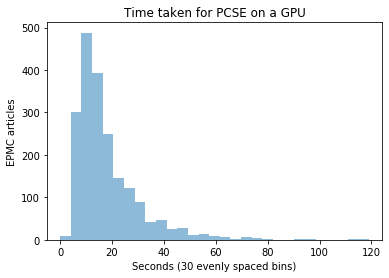

In [35]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

data = time_taken

bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   30) # fixed number of bins

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Time taken for PCSE on a GPU')
plt.xlabel('Seconds (30 evenly spaced bins)')
plt.ylabel('EPMC articles')

plt.show()